In [1]:
import pandas as pd
from collections import Counter

### Function to Get Dictionary Key

In [2]:
def getYearMonth(yr, m):
    if m < 10:
        return f"{yr}0{m}"
    else:
        return f"{yr}{m}"


### Load CSVs into a Dictionary of DataFrames
And print monthly ride counts while we're at it.

In [19]:
rawNY = {}
rawJC = {}

rides_by_month = []

for m in range(1, 13):
    month = m - 1
    rides = []
    for yr in range(2013, 2020):
        if (yr > 2013) or ((yr == 2013) and (m > 5)):
            yr_m = getYearMonth(yr, m)

            path = f"./data/{yr_m}-citibike-tripdata.csv"
            rawNY[yr_m] = pd.read_csv(path)
            rides.append(rawNY[yr_m].size)

            if (yr > 2015) or ((yr == 2015) and (m > 8)):
                path = f"./data/JC-{yr_m}-citibike-tripdata.csv"
                rawJC[yr_m] = pd.read_csv(path)
                rides[-1] = rides[-1] + rawJC[yr_m].size
        else:
            rides.append(0)
    rides_by_month.append(rides)
        
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
tot_rides_hist_df = pd.DataFrame.from_records(rides_by_month, index=months, columns=years)
tot_rides_hist_df

,2013,2014,2015,2016,2017,2018,2019
Jan,0,4506000,4283280,7754355,11094030,10975065,14804445
Feb,0,3371040,2953950,8536860,12085095,12873270,14434635
Mar,0,6586755,5127390,14001480,11097990,14906715,20273490
Apr,0,10061700,9785850,15442365,20048850,19967655,26987250
May,0,12991755,14429790,18476520,23238510,27887490,29410470
Jun,8665545,14053200,14118285,22263975,26454810,29910600,32472000
Jul,12651240,14532630,16285140,21068190,26537580,29338395,33372150
Aug,15029370,14452335,17685660,23877180,27779550,30324135,35894025
Sep,15515385,14308305,19445505,25234215,28668255,28753590,37412160
Oct,15565680,12430665,18473115,24052245,28987665,28766925,32022390


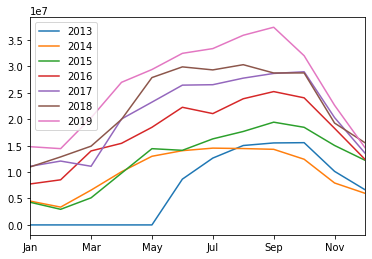

In [21]:
tot_hist_chart = tot_rides_hist_df.plot.line()
tot_hist_chart

### Evaluate DF Column Name Usage

In [22]:
def countColumns():
    column_counts = Counter()
    for month, df in raw.items():
        for column in df.columns:
            column_counts[column] += 1
    return column_counts.most_common()

countColumns()

[('tripduration', 57),
 ('starttime', 57),
 ('stoptime', 57),
 ('start station id', 57),
 ('start station name', 57),
 ('start station latitude', 57),
 ('start station longitude', 57),
 ('end station id', 57),
 ('end station name', 57),
 ('end station latitude', 57),
 ('end station longitude', 57),
 ('bikeid', 57),
 ('usertype', 57),
 ('birth year', 57),
 ('gender', 57),
 ('Trip Duration', 15),
 ('Start Time', 15),
 ('Stop Time', 15),
 ('Start Station ID', 15),
 ('Start Station Name', 15),
 ('Start Station Latitude', 15),
 ('Start Station Longitude', 15),
 ('End Station ID', 15),
 ('End Station Name', 15),
 ('End Station Latitude', 15),
 ('End Station Longitude', 15),
 ('Bike ID', 15),
 ('User Type', 15),
 ('Birth Year', 15),
 ('Gender', 15)]

### Find DFs with "Readable" Column Names

In [23]:
rawNY['201512'].head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1


In [24]:
rawNY['201601'].head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,362,2016-01-01 00:02:52,2016-01-01 00:08:54,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,24647,Subscriber,1964.0,2


In [25]:
rawNY['201703'].head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1076,2017-03-01 00:03:02,2017-03-01 00:20:58,3275,Columbus Drive,40.718355,-74.038914,3207,Oakland Ave,40.737604,-74.052478,26283,Subscriber,1991.0,1


In [26]:
rawNY['201704'].head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,252,2017-04-01 00:14:36,2017-04-01 00:18:48,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,26238,Subscriber,NaN,0


### Normalize Column Names

In [29]:
renames = {
    "Trip Duration": "duration",
    "Start Time": "start",
    "Stop Time": "end",
    "Start Station ID": "start_id",
    "Start Station Name": "start_name",
    "Start Station Latitude": "start_lat",
    "Start Station Longitude": "start_lng",
    "End Station ID": "end_id",
    "End Station Name": "end_name",
    "End Station Latitude": "end_lat",
    "End Station Longitude": "end_lng",
    "Bike ID": "bike_id",
    "User Type": "type",
    "Birth Year": "birth_year",
    "Gender": "gender",
    "tripduration": "duration",
    "starttime": "start",
    "stoptime": "end",
    "start station id": "start_id",
    "start station name": "start_name",
    "start station latitude": "start_lat",
    "start station longitude": "start_lng",
    "end station id": "end_id",
    "end station name": "end_name",
    "end station latitude": "end_lat",
    "end station longitude": "end_lng",
    "bikeid": "bike_id",
    "usertype": "type",
    "birth year": "birth_year",
    "gender": "gender",
}

# for yr in range(2016, 2018):
#     for m in range(1, 13):
#         if yr == 2017 && m > 3:
#             break
for yr in range(2014, 2020):
    for m in range(1, 13):
        yr_m = getYearMonth(yr, m)
        raw[yr_m].rename(columns=renames, inplace=True)

countColumns()

[('duration', 72),
 ('start', 72),
 ('end', 72),
 ('start_id', 72),
 ('start_name', 72),
 ('start_lat', 72),
 ('start_lng', 72),
 ('end_id', 72),
 ('end_name', 72),
 ('end_lat', 72),
 ('end_lng', 72),
 ('bike_id', 72),
 ('type', 72),
 ('birth_year', 72),
 ('gender', 72)]